<a href="https://colab.research.google.com/github/oseias-silva-magalhaes-1990/Codes---Python-and-SQL/blob/master/TrabalhoClassificadorMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# coding=utf-8
# Trabalho: Teste de Classificadores para Generos Musicais
# Author: Oseias Magalhaes
#

!pip install deslib

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import matplotlib as pl
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from deslib.util.datasets import make_P2
from sklearn.model_selection import GridSearchCV
from sklearn import manifold, datasets
from sklearn.manifold.t_sne import TSNE
from sklearn.datasets.base import load_digits
import itertools
import pandas as pd
import seaborn as sns
import urllib
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import  model_selection

import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Plotting-related functions
def make_grid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [ ]:
# Plotting the Classifier Decision

def plot_classifier_decision(ax, clf, X, X_embedded, mode='line', **params):
 
# create meshgrid
    resolution = 200 # 100x100 background pixels
    y_predicted = clf.predict(X);
    X2d_xmin, X2d_xmax = np.min(X_embedded[:,0]), np.max(X_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_embedded[:,1]), np.max(X_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
    ax.contourf(xx, yy, voronoiBackground, levels=10, cmap="RdBu_r")
    plot_dataset(X_embedded, y_predicted, ax, 'teste', **params)

    return ax
  

In [ ]:
# Plotting the dataset

def plot_dataset(X, y, ax=None, title=None, **params):

    X_t=pd.DataFrame(X)
    y=pd.DataFrame(y)
    XY=pd.concat([X_t,y], axis=1)
    XY.columns = ['x', 'y', 'digit']

    customPalette=sns.hls_palette(10, l=.7, s=1)

    ax.set_xlim(XY['x'].min()*0.98,XY['x'].max()*1.02)
    ax.set_ylim(XY['y'].min()*0.98,XY['y'].max()*1.02)

    for i in range(0,10):
        k=0
        for l, row in XY.loc[XY['digit']==i,:].iterrows():
            if k==0: 
                ax.plot(row['x'], row['y'], '.', color=customPalette[i], label=int(row['digit']))
                ax.legend(numpoints=1, markerscale=3, loc='upper right', bbox_to_anchor=(1.2, 1.0))
                k += 1    
            ax.annotate(int(row['digit']), (row['x'], row['y']), horizontalalignment='center', verticalalignment='center', size=10, color=customPalette[i])
            ax.set_title(title, fontsize=15)
            
    return ax

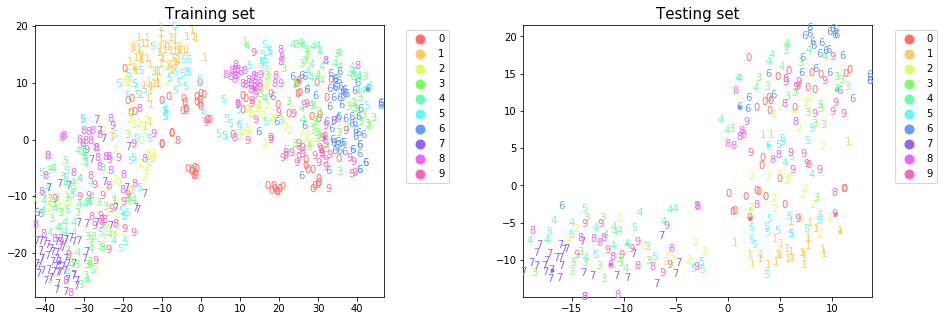

In [ ]:
# Loading datasets
#rng = np.random.RandomState(123)

# replace below by your data and model
#digits = load_digits()
#X,y = digits.data, digits.target

#print(X.shape)
#print(y.shape)

#X = pd.read_csv('data.csv')
#print(X.shape)
#del X['ind']
#X=X.to_numpy()
#X=X.tolist()
#print(X.shape)
#
#y = np.loadtxt('classes6.dms')
#print(y.shape)
#
# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada

#load features
data = pd.read_csv('data.csv')

# Dropping filename
data = data.drop(['filename'],axis=1)

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

X_Embedded_train=X_train
X_Embedded=X_test

X_Embedded_train = TSNE(n_components=2).fit_transform(X_train)
X_Embedded = TSNE(n_components=2).fit_transform(X_test) 

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plot_dataset(X_Embedded_train, y_train, ax=axs[0], title='Training set')
plot_dataset(X_Embedded, y_test, ax=axs[1], title='Testing set')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# Define single classifiers

lr = LogisticRegression()
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=3)
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(100), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
cb = VotingClassifier(estimators=[('DecisionTree', dt), ('NaiveBayes', nb), ('LogisticRegression',lr), ('KNeighborsClassifier',knn),('MLPClassifier',mlp)], voting='soft')
bg  =  BaggingClassifier( knn, max_samples = 0.5 ,  max_features = 0.5 )
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=1.0)


# parameters for SVM
parameters = [
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['poly']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
]
svm = SVC(gamma='scale')
svm = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=10, iid=False)

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'SVM', 'RF', 'ALL', 'BG', 'GBR']
methods = [lr, dt, knn, nb, mlp, svm, rf, cb, bg, gbr]






NameError: ignored

In [ ]:
# Fit the classifiers
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))
    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification accuracy LogisticRegresson = 0.6033333333333334
Classification accuracy DecisionTree = 0.49
Classification accuracy KNN = 0.6266666666666667
Classification accuracy NaiveBayes = 0.41
Classification accuracy MLP = 0.44
Classification accuracy SVM = 0.6833333333333333
Classification accuracy RF = 0.61


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification accuracy ALL = 0.6266666666666667
Classification accuracy BG = 0.6133333333333333
Classification accuracy GBR = -0.1009216197983882


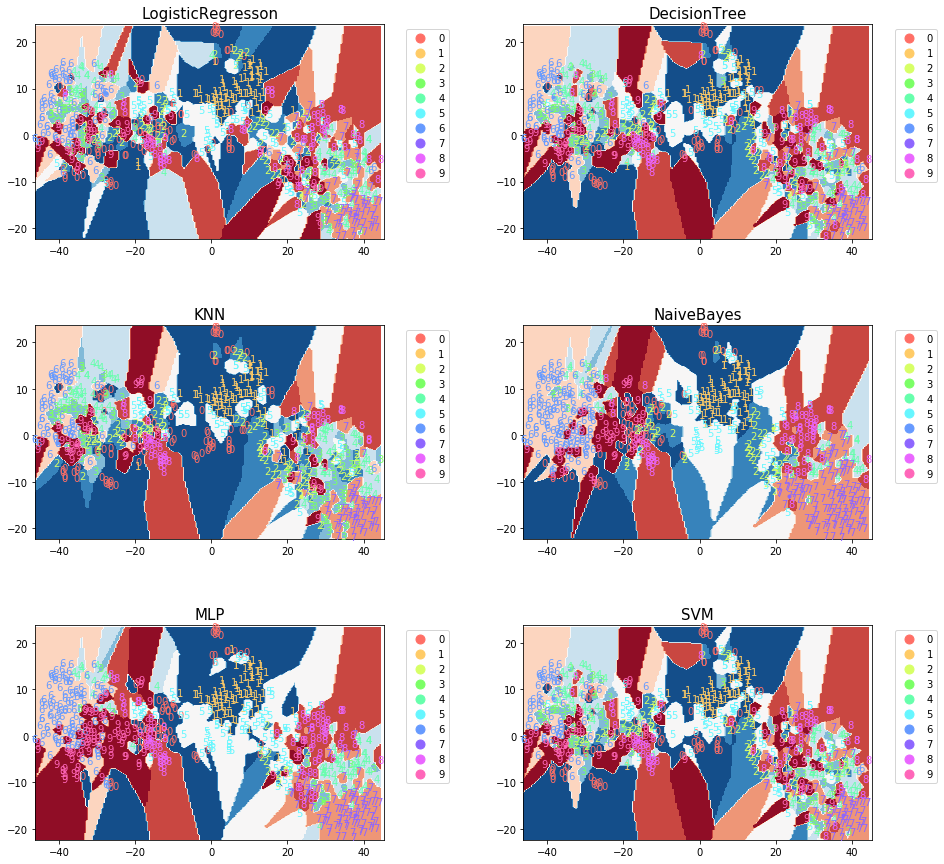

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the Decision Border of the Classifiers.
fig2, sub = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, ax, title in zip(methods, sub.flatten(), titles):
    plot_classifier_decision(ax, clf, X_train, X_Embedded_train, mode='filled', alpha=0.4)
    ax.set_title(title, fontsize=15)
# Setting figure to show
# sphinx_gallery_thumbnail_number = 3

plt.show()
plt.tight_layout()    

In [ ]:
# Plotting the confusion matrix 
def plot_confusion_matrix(ax, cm, title=None):

    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    sns.heatmap(df_cm, annot=True)
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return ax

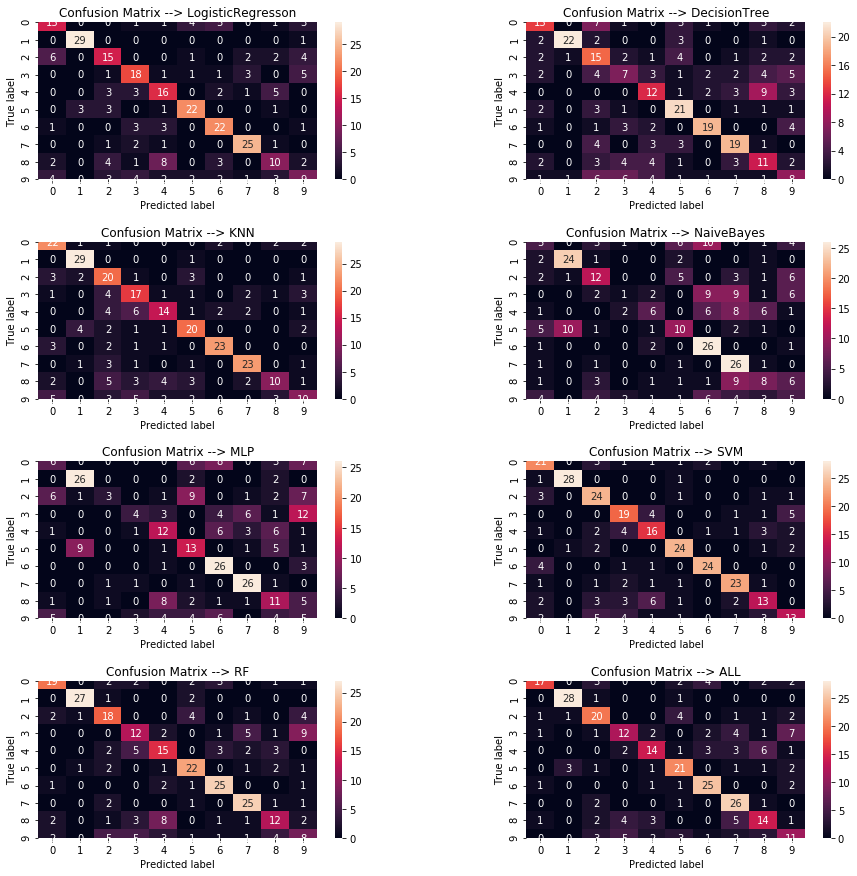

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the Confusion Matrix
fig3, sub1 = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test , y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    sns.heatmap(df_cm, annot=True, ax=ax)
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

plt.show()
plt.tight_layout()    

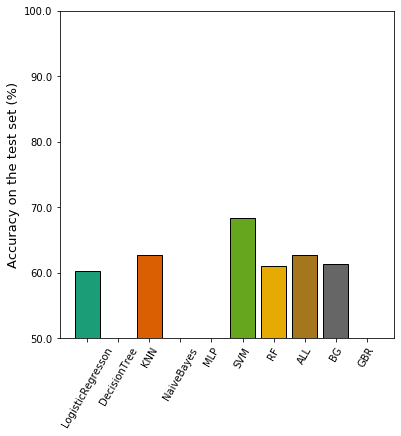

In [ ]:
###############################################################################
# Plotting the results
# -----------------------
# Let's now evaluate the methods on the test set.
#
cmap = get_cmap('Dark2')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
fig, ax = plt.subplots(figsize=(6, 6.5))
pct_formatter = FuncFormatter(lambda x, pos: '{:.1f}'.format(x * 100))
ax.bar(np.arange(len(methods)),
       scores,
       color=colors,
       tick_label=titles,
       edgecolor='k')

ax.set_ylim(0.50, 1.00)
ax.set_ylabel('Accuracy on the test set (%)', fontsize=13)
ax.yaxis.set_major_formatter(pct_formatter)
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
plt.subplots_adjust(bottom=0.18)
plt.show()

In [ ]:
import cv2
import numpy as np
import pandas as pd
import re
import math
from skimage import feature
from skimage.feature import hog
from imutils import paths
from google.colab.patches import cv2_imshow
import os

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Input

# Load Inception_v3 pretrained on ImageNet dataset
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_tensor=Input(shape=(299,299,3)))


# List of paths 
file_list=[]
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/blues"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/classical"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/country"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/disco"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/hiphop"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/jazz"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/metal"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/pop"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/reggae"))
file_list.append(os.listdir(r"/content/drive/My Drive/GTZAN/images/rock"))

# general path
path='/content/drive/My Drive/GTZAN/images/'

# list of classes
class_names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'] 

X = []
X_deep = []
y = []

# Feature extraction
for classes_files, classe in zip (file_list, range(10)):
    for i in range(100):
      name= str(path) + str(class_names[classe]) + str('/') + str(classes_files[i])
      imagem = cv2.imread(name)
      imagem = cv2.resize(imagem, (299,299))
      print(imagem.shape)
      altura, largura, _ = imagem.shape
    
# Convert the image to RGB and Gray    
      cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
      rgb   = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Color Histograms
      r_histograma = cv2.calcHist([rgb], [0], None, [256], [0, 256])/(altura*largura)
      g_histograma = cv2.calcHist([rgb], [1], None, [256], [0, 256])/(altura*largura)
      b_histograma = cv2.calcHist([rgb], [2], None, [256], [0, 256])/(altura*largura)

# Local Binary Pattern (LBP)
      lbp = feature.local_binary_pattern(cinza, 59, 1, method="uniform")
      (lbp_histograma, _) = np.histogram(lbp.ravel(), bins=59, range=(0, 59))
      lbp_histograma = lbp_histograma.astype("float")
      lbp_histograma /= (lbp_histograma.sum())
    
# Hog (Hostogram of Gradient - Direction)
      hg = hog(cinza, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(8, 8), block_norm='L2-Hys')
    
# Concatenate the handcrafted feature sets
      X_image = [lbp_histograma, hg, r_histograma, g_histograma, b_histograma]    
      X_image_aux = []
      for aux in X_image:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      X_image = [i for i in X_image_aux]
      y.append(classe)
      X.append(X_image)
      
# Extract deep features using InceptionV3 pretrained model 
      img = cv2.resize(imagem,(299,299))
      xd = image.img_to_array(img)
      xd = np.expand_dims(xd, axis=0)
      xd = preprocess_input(xd)
      deep_features = model.predict(xd)
      print(deep_features.shape)
      
      X_image_aux = []
      for aux in deep_features:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      deep_features = [i for i in X_image_aux]
      
      X_deep.append(deep_features)

            
# Saving the extracted features (handcrafted) in a csv file
df = pd.DataFrame(X)
df.to_csv('X.csv', header=False, index=False)

# Saving the extracted features (deep) in a csv file
df = pd.DataFrame(X_deep)
df.to_csv('X_deep.csv', header=False, index=False)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv('y.csv', header=False, index=False)

(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1, 2048)
(299, 299, 3)
(1

In [ ]:
# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)
print(X_test)
# Treina o classificador
#clfa = GaussianNB()
clfa = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
clfa = clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted=clfa.predict(X_test)

# calcula a acurÃ¡cia na base de teste
score=clfa.score(X_test, y_test)

# calcula a matriz de confusÃ£o
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("Accuracy = %.5f " % score)
print("Confusion Matrix:")
print(matrix)

# EXEMPLO USANDO VALIDAÃ‡ÃƒO CRUZADA

clfb = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#clfb = GaussianNB()
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

# matriz de confusÃ£o da validaÃ§Ã£o cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Confusion Matrix:")
print(cm)

In [ ]:
# Plot mistakes (images)
print(predicted.shape)
for i in range(len(predicted)):
    if (predicted[i] != y_test[i]):
      print(X[j][0])
      print(X_test[i][0])
      dist=1
      j=0
      while (j<len(X) and dist !=0):
        dist = np.linalg.norm(X[j][0]- X_test[i][0])
        j+=1
        print("Label:", y[j-1], class_names[y[j-1]], "  /  Prediction: ", predicted[i], class_names[predicted[i]] )
        name= "/content/drive/My Drive/Colab Notebooks/Base1/" + str(class_names[y[j-1]]) + "/" + str(j)+ ".jpg" 
        print(name)
        im=cv2.imread(name)
        cv2_imshow(im)  